# Project Name : Curret COVID-19 Pandemic Status
## Auther : Negin Zarbakhsh (20202219)

## Project Summary:

On March 11 2020, COVID-19 was declared a pandemic by the World Health Organization (WHO). To bring this pandemic to an end, a large share of the world population needs to get immune against the virus, and vaccine is one of the safest way to reach this goal. Travel restrictions, self-isolation, tracing and quarantine of contacts, testing, hygiene measures, social distancing, banning large public events, remote working and learning and wearing a face mask in public are common non-pharmaceutical strategies designed to combat this pandemic, while all of these measures have devastated numerous businesses and impacted the economy negatively. 
In this project, we want to review the numbers for Ireland and compare it with the countries with almost same poplation to see which countries have a better performance in controlling the spread of visrus.
For this, belows have been reviwed:
* 1- Review the world dataset
* 2- Review European region Dataset
* 3- Review the Ireland Dataset
* 4- Using world shape data to visualise the result

In [353]:
# Importing all required libraries
import requests
import pandas as pd
from pprint import pprint
import numpy as np
import csv
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpds
import contextily as ctx

#  1: Data Collection & Preperation Phase:

## 1 - John Hopkings Dataset

From early start of COVID-19, John Hopkings were at the forefront of the international response to COVID-19. This  [website](https://coronavirus.jhu.edu/map.html) is really a good source to see the current situation of COVID-19 globally

### 1-1: Loading and Reading Data

In [72]:
# Specifing URL from John Hopkings DataSets
john_hopkings_dataset_confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
john_hopkings_dataset_recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
john_hopkings_dataset_deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [5]:
# Checking the structure of dataframe to see what changes are required. 
test =  pd.read_csv (john_hopkings_dataset_confirmed_url)
test.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696


### 2-1: Cleaning and reshaping the data

In this section, we want to review the COVID-19 situation in the world. For reching to this aim, first we need to define a function that do the follwing tasks:
* 1 - Changing the URLs (Death, Recovered and Confirmed) into CSV formats.
* 2 - Grouping data based on the "Country/Region and sum all the numbers related to that country
* 3- Droping spatial features, since we are going to use some shape files for this purpose
* 4- Transposing row and coulmns to se countries in rows and numbers based on the dates

In [96]:
# Function creation based on the explanation
def group_covid_data (hopkin_url, covid_case):
    df =  pd.read_csv (hopkin_url)
    # Grouping data by country to have once single name for all countries
    df = df.groupby('Country/Region').sum()
    df_drop = df.drop (['Lat', 'Long'], axis = 1)
    df_drop = df_drop.T 
    return df_drop

In [7]:
# Calling functions for our 3 seprated datasets:
hopkings_confirmed = group_covid_data(john_hopkings_dataset_confirmed_url, 'Confirmed')
hopkings_recovered = group_covid_data(john_hopkings_dataset_recovered_url, 'Recovered')
hopkings_deaths = group_covid_data(john_hopkings_dataset_deaths_url, 'Deaths')

In [8]:
hopkings_confirmed .tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
3/16/21,55995,118492,115540,11319,21446,992,2210121,179287,29154,497889,...,4282203,73770,80743,3,147028,2560,213791,2969,85240,36535
3/17/21,56016,118938,115688,11360,21489,992,2218425,180141,29166,501224,...,4287996,75138,80858,3,147577,2567,215984,3037,85502,36552
3/18/21,56044,119528,115842,11393,21558,1008,2226753,181165,29183,504581,...,4294328,76816,80971,3,148208,2570,218061,3126,85889,36611
3/19/21,56069,120022,115970,11431,21642,1011,2234913,182056,29192,508096,...,4299200,78401,81095,3,149145,2571,219912,3217,86059,36652
3/20/21,56093,120541,116066,11481,21696,1033,2241739,183127,29196,511440,...,4304839,79923,81339,3,150306,2572,221391,3278,86273,36662


In [176]:
hopkings_confirmed.isna().sum(), hopkings_recovered.isna().sum(), hopkings_deaths.isna().sum()

(Country/Region
 Afghanistan           0
 Albania               0
 Algeria               0
 Andorra               0
 Angola                0
                      ..
 Vietnam               0
 West Bank and Gaza    0
 Yemen                 0
 Zambia                0
 Zimbabwe              0
 Length: 192, dtype: int64,
 Country/Region
 Afghanistan           0
 Albania               0
 Algeria               0
 Andorra               0
 Angola                0
                      ..
 Vietnam               0
 West Bank and Gaza    0
 Yemen                 0
 Zambia                0
 Zimbabwe              0
 Length: 192, dtype: int64,
 Country/Region
 Afghanistan           0
 Albania               0
 Algeria               0
 Andorra               0
 Angola                0
                      ..
 Vietnam               0
 West Bank and Gaza    0
 Yemen                 0
 Zambia                0
 Zimbabwe              0
 Length: 192, dtype: int64)

This datasets is does not include any NULL Values, so only our reshaping function was required to shape it into a format that we could start our analysis. The datasets include cumulative numbers, so adding new feature to dataset was necessary for our analysis.

### 3-1: Feature Engineering

As we see in the below, all of the imported dataframes has cumulative numbers, while we are interested to see the number of new confirmed cases and new death based on the countries on daily bases. In the below, we will add new features to our datasets.

In [178]:
hopkings_confirmed['Ireland'].tail(3)

3/18/21    228796
3/19/21    229306
3/20/21    229831
Name: Ireland, dtype: int64

#### 3-1-1: New Features:
* Daily new confirmed cases
* Daily new death cases
* Growth confirmed cases
* Growth death cases
* Death Rate

In [12]:
# Copying dataset to make sure that we would keep the main DF
daily_confirmed = hopkings_confirmed.copy()
daily_deaths = hopkings_deaths.copy()
growth_confirmed = hopkings_confirmed.copy()
growth_deaths = hopkings_deaths.copy()

In [13]:
rows_len =len (hopkings_confirmed)
rows_len

424

In [177]:
# Calculating the daily number of confirmed cases & death + their growth rate
for date in range (1,rows_len ):
    #print (daily_confirmed.iloc[day])
    # Comparin the date with a day before to see the number of new cases both deaths and confirmed
    daily_confirmed.iloc[date] = hopkings_confirmed.iloc[date] - hopkings_confirmed.iloc[date-1]
    daily_deaths.iloc[date] = hopkings_deaths.iloc[date] - hopkings_deaths.iloc[date-1]
    # Calculating growth rate = COVID-19 growth rate = (number of new cases in new_day) / 
    #Total number of newcases till day before) *100
    growth_confirmed.iloc[date] = (daily_confirmed.iloc[date] / hopkings_confirmed.iloc[date-1]) * 100
    growth_deaths.iloc[date] = (daily_deaths.iloc[date] / hopkings_deaths.iloc[date-1]) * 100
    #print (daily_confirmed.iloc[day-1])
    #print (daily_confirmed.iloc[day])
# Calculating growth rate for all countries (comparing death and confimed)
death_rate = hopkings_deaths.copy()
# Formula = dividing total number of death on each date based on total confirmed date
for date in range (0, rows_len):
    death_rate.iloc[date] = (hopkings_deaths.iloc[date] / hopkings_confirmed.iloc[date]) * 100

To see if the new features are working appropriatily, we filtered Ireland feature to test this. As you could see the new features are working well for letting us know about the new cases (death + confirmed) and the assosiated growth.

In [15]:
hopkings_confirmed['Ireland'].tail(5) , daily_confirmed['Ireland'].tail(5), growth_confirmed['Ireland'].tail(5)

(3/16/21    227663
 3/17/21    228215
 3/18/21    228796
 3/19/21    229306
 3/20/21    229831
 Name: Ireland, dtype: int64,
 3/16/21    347
 3/17/21    552
 3/18/21    581
 3/19/21    510
 3/20/21    525
 Name: Ireland, dtype: int64,
 3/16/21    0.152651
 3/17/21    0.242464
 3/18/21    0.254584
 3/19/21    0.222906
 3/20/21    0.228952
 Name: Ireland, dtype: float64)

In [16]:
hopkings_deaths['Ireland'].tail(5), daily_deaths['Ireland'].tail(5), growth_deaths['Ireland'].tail(5)

(3/16/21    4552
 3/17/21    4566
 3/18/21    4566
 3/19/21    4576
 3/20/21    4585
 Name: Ireland, dtype: int64,
 3/16/21    18
 3/17/21    14
 3/18/21     0
 3/19/21    10
 3/20/21     9
 Name: Ireland, dtype: int64,
 3/16/21    0.397000
 3/17/21    0.307557
 3/18/21    0.000000
 3/19/21    0.219010
 3/20/21    0.196678
 Name: Ireland, dtype: float64)

In [18]:
death_rate['Ireland'].tail(5)

3/16/21    1.999447
3/17/21    2.000745
3/18/21    1.995664
3/19/21    1.995587
3/20/21    1.994944
Name: Ireland, dtype: float64

## 2- Europe COVID-19 Dataset

### 1-2: Reading Data and cleaning data
Data Source: Europe: Coronavirus (COVID-19) Subnational 

In [179]:
#  Data Extracted from Europe Dataset
df_eu = pd.read_csv ('https://proxy.hxlstandard.org/data/e2bb4b/download/jrc-covid-19-regions-hxl.csv')
df_eu.head()

C:\Users\Negee\New folder\envs\geo-env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,#date,#country+code+iso3,#country+name,#adm1+name,#geo+lat,#geo+lon,#affected+positive+total,#affected+dead+total,#affected+recovered+total,#affected+positive,#affected+hospitalized,#affected+intensive_care,#indicator+eu,#indicator+eucpm,NaN
1,2020-01-22,GRC,Greece,NOT SPECIFIED,NaN,NaN,0,0,0,0,NaN,NaN,TRUE,TRUE,NaN
2,2020-01-22,ISL,Iceland,NOT SPECIFIED,NaN,NaN,0,0,0,0,NaN,NaN,FALSE,TRUE,NaN
3,2020-01-22,LIE,Liechtenstein,Liechtenstein,47.164696,9.555,0,0,0,0,NaN,NaN,FALSE,FALSE,LI
4,2020-01-22,MCO,Monaco,Monaco,43.738348,7.424451,0,0,0,0,NaN,NaN,FALSE,FALSE,MC


Based on the error, this datasets has two major issue:
* 1- Having Mix DataType in mentioned columns
* 2- Having two headers for our dataset 

In [182]:
df_eu.dtypes;

In [183]:
# Definening the correct data type 
dtype = {
    'Date': object,                  
    'iso3': object,                 
    'CountryName': object,           
    'Region': object,               
    'lat': float,                  
    'lon': float,                  
    'CumulativePositive': float,   
    'CumulativeDeceased': float,    
    'CumulativeRecovered': float, 
    'CurrentlyPositive': float,   
    'Hospitalized': float,         
    'IntensiveCare': float,        
    'EUcountry': bool,            
    'EUCPMcountry': bool,          
    'NUTS': object
}

In [184]:
# Solving Mentioned errors by skipping the first two rows & defining our objects
df_eu = pd.read_csv ('https://proxy.hxlstandard.org/data/e2bb4b/download/jrc-covid-19-regions-hxl.csv', dtype = dtype, skiprows = range (1,2))

In [185]:
# Data Coverage: From January 2020 - Till March 2021
df_eu['Date'].min(), df_eu['Date'].max()

('2020-01-22', '2021-03-22')

For spatial data analysis, we require lat, long features to set the coordinates, so we have decided to dismiss the missing valu

In [186]:
df_eu.dropna(axis = 0 , subset = ['lat', 'lon'], inplace = True)

### 2-2 :Creating GEODATA FRAME

Hear, we use Coordinate Reference System (CRS = 'EPSG:4326'): For this please refer to [this link](https://epsg.io/4326)
* Area of use: World
* To change our current dataset to GeoDataFrame. The aim of this step, was to visualise the current pandemic situation on map to have a better understanding of pandemic. Our dataset includes lat and long features and we added the geometry feature to dataset by using the introduced website.

In [286]:
# Create GEODATAFRAMe based on the defined crs & our lon,lat and add geomerty feature
gdf = gpd.GeoDataFrame(df_eu, crs = 'EPSG:4326', geometry = gpd.points_from_xy(df_eu.lon, df_eu.lat) )
gdf.tail()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry
154823,2021-03-22,CHE,Switzerland,Uri,46.775402,8.627444,1909.0,39.0,0.0,1870.0,3.0,0.0,False,False,CH062,POINT (8.62744 46.77540)
154824,2021-03-22,CHE,Switzerland,Valais,46.211633,7.611267,32478.0,757.0,0.0,31721.0,32.0,5.0,False,False,CH012,POINT (7.61127 46.21163)
154825,2021-03-22,CHE,Switzerland,Vaud,46.561760,6.648929,71512.0,956.0,0.0,70556.0,180.0,38.0,False,False,CH011,POINT (6.64893 46.56176)
154826,2021-03-22,CHE,Switzerland,Zug,47.161402,8.538864,6930.0,114.0,6631.0,185.0,8.0,0.0,False,False,CH066,POINT (8.53886 47.16140)
154827,2021-03-22,CHE,Switzerland,Zurich,47.417407,8.655988,91985.0,1314.0,0.0,90671.0,144.0,26.0,False,False,CH040,POINT (8.65599 47.41741)


## 3- 2020 Population Dataset
This CSV file extracted from worldmeter website to have the population of all countries

In [189]:
# Loading population 2020 datasets
population = pd.read_csv ('population2020.csv')
population.head()

,Country,Population
0,China,"1,439,323,776"
1,India,"1,380,004,385"
2,United States,"331,002,651"
3,Indonesia,"273,523,615"
4,Pakistan,"220,892,340"


#  2- Data Analysis Part


## 1-2 COVID-19 in Ireland

The aim of this section is to review Ireland COVID-19 numbers

In [19]:
# reading today from system
today = pd.to_datetime("now")

print ('Current Status of COVID 19 in Ireland:')
print ('Total Number of Confirmed Cases in Ireland till', today, daily_confirmed['Ireland'].sum())
print ('Total Number of Death Cases in Ireland till', today, daily_deaths['Ireland'].sum())

Current Status of COVID 19 in Ireland:
Total Number of Confirmed Cases in Ireland till 2021-03-21 22:42:23.222406 229831
Total Number of Death Cases in Ireland till 2021-03-21 22:42:23.222406 4585


Ireland witness the highest daily death numbers on 24th April 2020 and 2nd Feberary 2021. Below the top 20 days with the highest daily death toll are highlighted

In [20]:
# Most Daily Death in Ireland
Ireland_death = pd.DataFrame(daily_deaths['Ireland'])
Ireland_death.sort_values('Ireland', ascending=False).head(20). style.background_gradient(cmap = 'Reds')  # Highlighting DF

,Ireland
4/24/20,220
2/2/21,101
2/3/21,94
1/19/21,92
1/26/21,89
1/30/21,78
1/23/21,77
4/20/20,77
2/4/21,74
2/13/21,66


Ireland expereienced the highest daily confiemd cases in January 2021. The numbers are extremily high comparing to the total population. 

In [21]:
# Most Daily Death in Ireland
Ireland_death = pd.DataFrame(daily_confirmed['Ireland'])
Ireland_death.sort_values('Ireland', ascending=False).head(20). style.background_gradient(cmap = 'Reds')  # Highlighting DF

,Ireland
1/8/21,8227
1/6/21,7832
1/10/21,6886
1/7/21,6503
1/4/21,6110
1/5/21,5325
1/3/21,4961
1/11/21,4926
1/9/21,4843
1/14/21,3913


In the below linerar charts, the growth of confirmed cases and death are shown

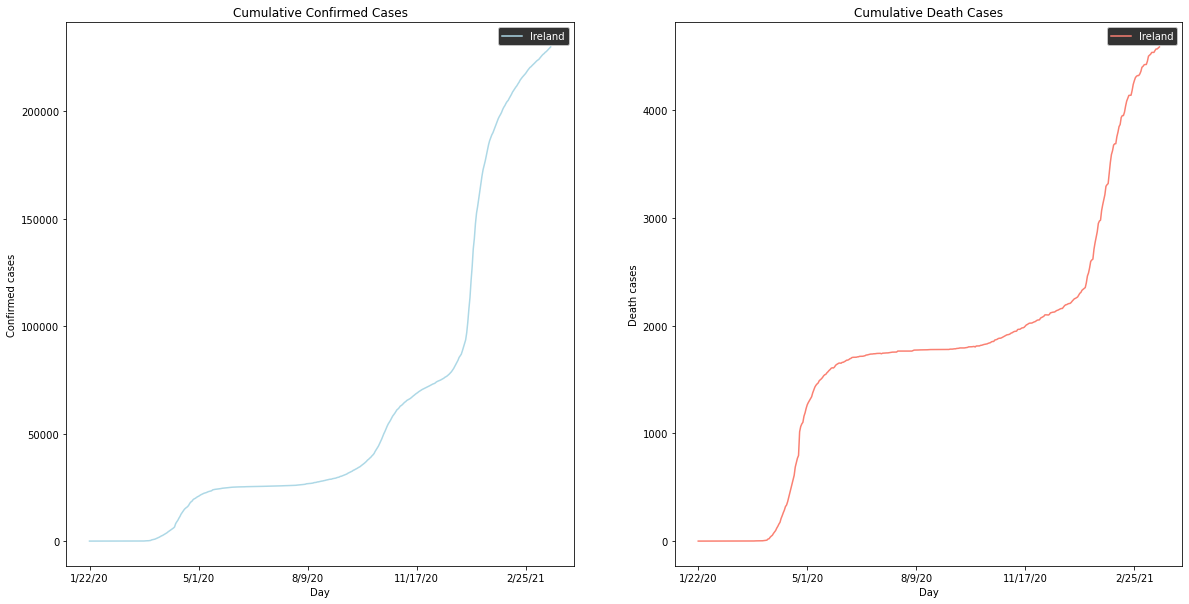

In [22]:
# Ploting subplots of Cumulative Confirmed and Death Cases in Ireland
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.style.use ('dark_background')
hopkings_confirmed['Ireland'].plot(ax=axes[0], color = "lightblue", figsize = (20,10))
# Add Label & Title   
axes[0].set ( title = "Cumulative Confirmed Cases", 
         xlabel = 'Day',
         ylabel = 'Confirmed cases')
#Make the legend Visible
axes[0].legend().set_visible (True)

hopkings_deaths['Ireland'].plot(ax=axes[1], color = "salmon")
# Add Label & Title   
axes[1].set ( title = "Cumulative Death Cases", 
         xlabel = 'Day',
         ylabel = 'Death cases')
#Make the legend Visible
axes[1].legend().set_visible (True)

The number of daily confirmed cases has not seen a huge drop comparing to the number of daily death. This could be the result of vaccination or level_5 restriction

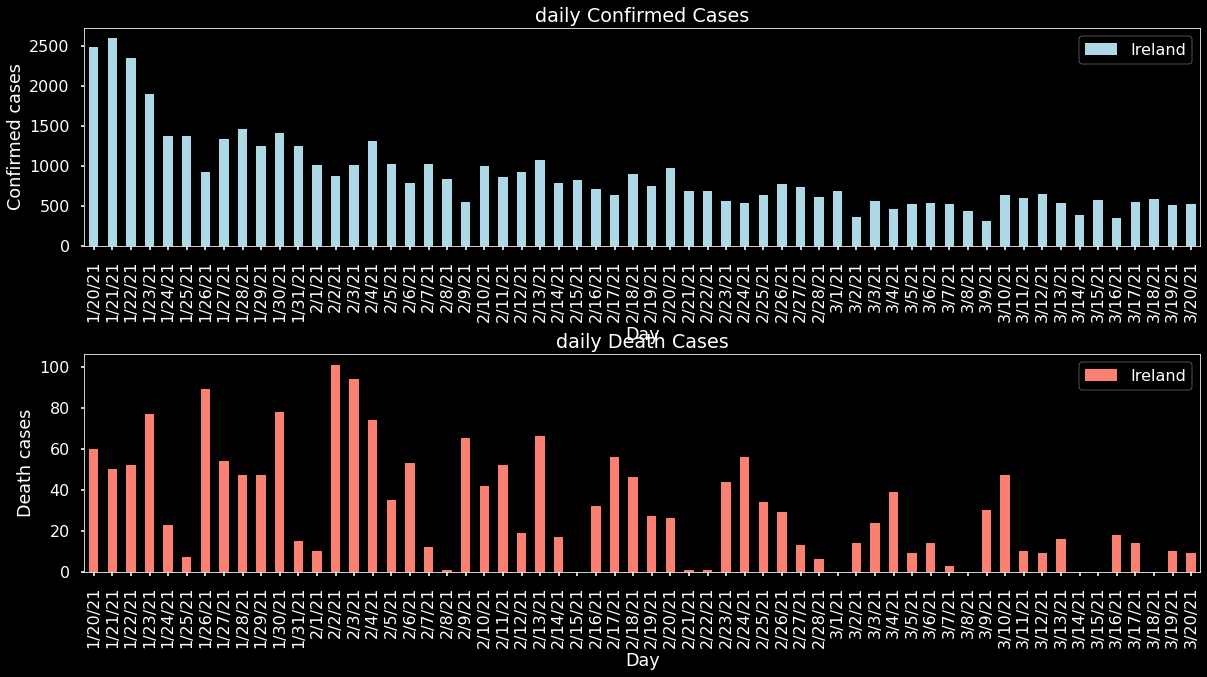

In [42]:
# Ploting subplots of Daily Confirmed and Death Cases in Ireland in Past two months
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.style.use ('seaborn-poster')

# Space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5) # the amount of width and height reserved for blank space between subplots

daily_confirmed['Ireland'][364:].plot(ax=axes[0], color = "lightblue", figsize = (20,10), kind = 'bar')
# Add Label & Title   
axes[0].set ( title = "daily Confirmed Cases", 
         xlabel = 'Day',
         ylabel = 'Confirmed cases')
#Make the legend Visible
axes[0].legend().set_visible (True)

daily_deaths['Ireland'][364:].plot(ax=axes[1], color = "salmon", figsize = (20,10), kind = 'bar')
# Add Label & Title   
axes[1].set ( title = "daily Death Cases", 
         xlabel = 'Day',
         ylabel = 'Death cases')
#Make the legend Visible
axes[1].legend().set_visible (True)

Hear, the growth rate features that we created in previous section helped us to have a better vision of the situation. What we see in these bar chart is that both number (confirmed and death) are decreasing in the last two month, while the death is more decereasing comparing to confirmed cases, which may be the result of vaccinating old people in Ireland

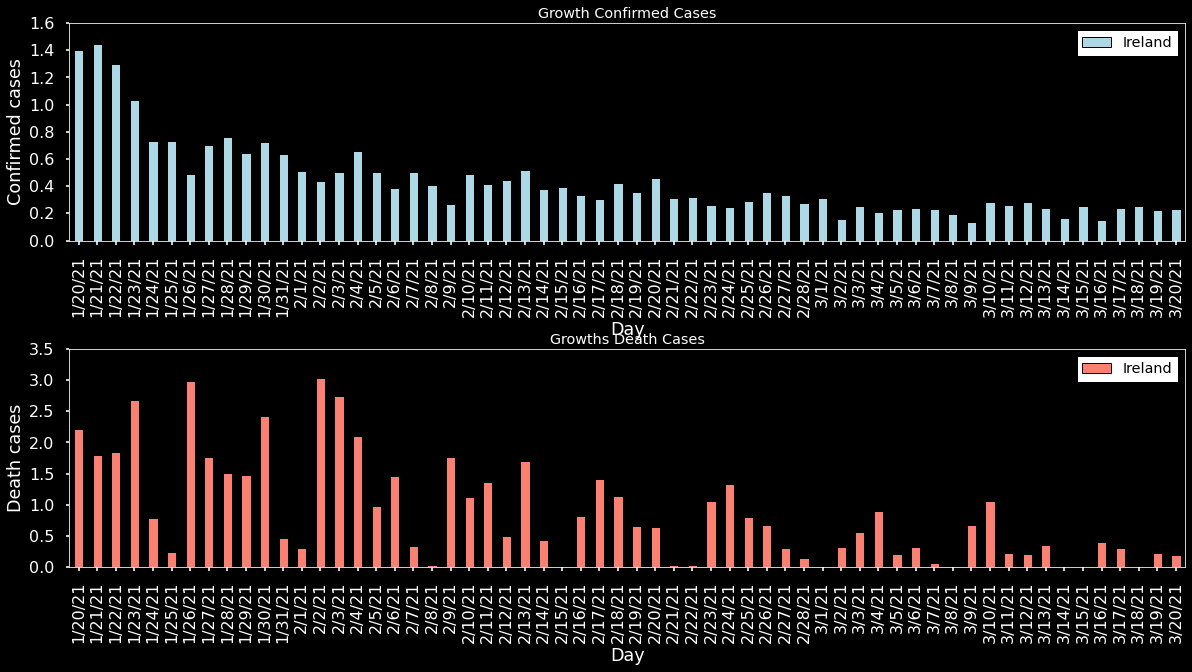

In [276]:
# Ploting subplots of growth of deaths and confirmed numbers in Ireland in Past two months
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.style.use ('classic')

# Space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5) # the amount of width and height reserved for blank space between subplots

growth_confirmed['Ireland'][364:].plot(ax=axes[0], color = "lightblue", figsize = (20,10), kind = 'bar')
# Add Label & Title   
axes[0].set ( title = "Growth Confirmed Cases", 
         xlabel = 'Day',
         ylabel = 'Confirmed cases')
#Make the legend Visible
axes[0].legend().set_visible (True)

growth_deaths['Ireland'][364:].plot(ax=axes[1], color = "salmon", figsize = (20,10), kind = 'bar')
# Add Label & Title   
axes[1].set ( title = "Growths Death Cases", 
         xlabel = 'Day',
         ylabel = 'Death cases')
#Make the legend Visible
axes[1].legend().set_visible (True)

## 2-2: Comparing Ireland with European countries with almost the same population as Ireland

In this part, we compared, Ireland numbers with the countries that has similar population

In [25]:
population.sort_values('Population', ascending=False)
population.iloc[114:126]

,Country,Population
114,Denmark,"5,792,202"
115,Finland,"5,540,720"
116,Congo,"5,518,087"
117,Slovakia,"5,459,642"
118,Norway,"5,421,241"
119,Oman,"5,106,626"
120,State of Palestine,"5,101,414"
121,Costa Rica,"5,094,118"
122,Liberia,"5,057,681"
123,Ireland,"4,937,786"


Based on the above table , we would compare Irelnd with 'Denmark', 'Finland', 'Norway', 'Ireland','New Zealand'

Based on the plots, New Zealand had the best monitoring system and was able to successfully control the pandemic. while Ireland witnessed the highest number both in cases and death numbers

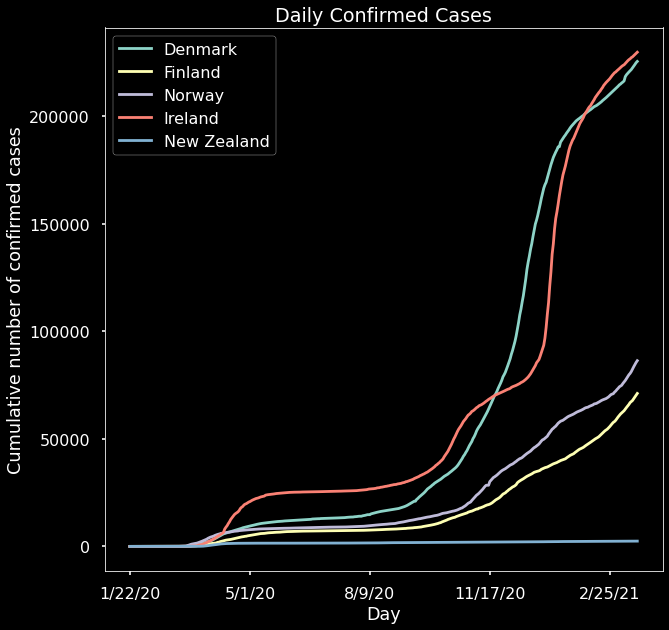

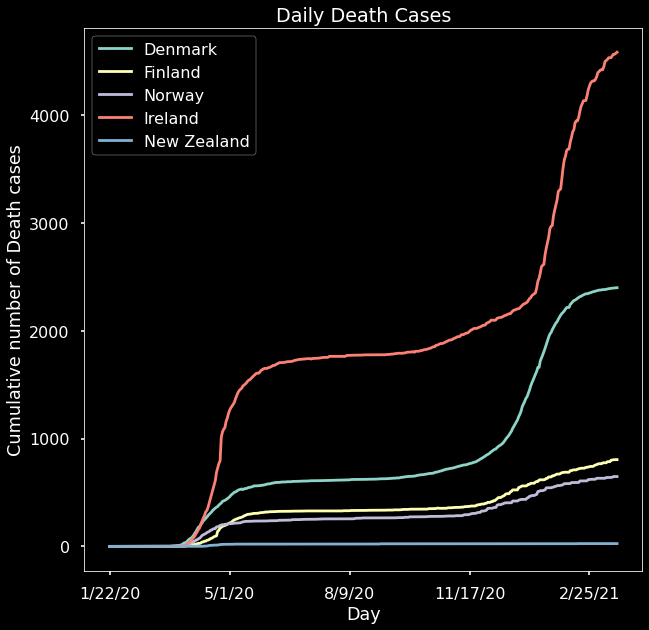

In [26]:
fig,ax = plt.subplots(figsize = (10,10))
for countries in ['Denmark', 'Finland', 'Norway', 'Ireland','New Zealand']:
    hopkings_confirmed[countries].plot()
    
# Add Label & Title   
ax.set ( title = "Daily Confirmed Cases", 
         xlabel = 'Day',
         ylabel = 'Cumulative number of confirmed cases')
#Make the legend Visible
ax.legend().set_visible (True)

fig,ax = plt.subplots(figsize = (10,10))
for countries in ['Denmark', 'Finland', 'Norway', 'Ireland','New Zealand']:
    hopkings_deaths[countries].plot()
# Add Label & Title   
ax.set ( title = "Daily Death Cases", 
         xlabel = 'Day',
         ylabel = 'Cumulative number of Death cases')
#Make the legend Visible
ax.legend().set_visible (True)

### Wold Map for all European Countries

In this section, we shows the death numbers on 22 March 2021, to see the situation of all European countries together 

In [277]:
# Checking the styles of world map. We chose Open Street Map style from list
ctx.providers.keys() , ctx.providers.OpenStreetMap.keys()

(dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG']),
 dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH']))

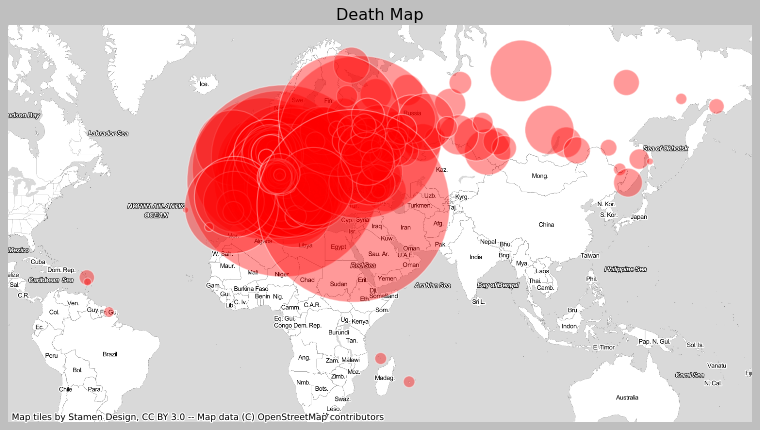

In [288]:
# Using OpenStreetMap
fig , ax = plt.subplots (figsize = (12,10))
gdf[gdf["Date"] == "2021-03-21"].to_crs (epsg = 3857).plot(markersize = 'CumulativeDeceased', alpha = 0.4, ax = ax, color = 'Red', edgecolor = 'White')#Projecting Data (to_crs by epsg number)
# Using ctx libarry which is match with geopandas
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)
plt.title ('Death Map')
plt.axis ("off");

Since the Cumulative numbers for death is ranging from very small number to very large numbers, we need to normalize the data so we could have a better display on map. Hear, we have used the standard formula for normalisation

In [289]:
gdf['normalized_death'] = ((gdf['CumulativeDeceased'] - gdf['CumulativeDeceased'].min()) / (gdf['CumulativeDeceased'].max() - gdf['CumulativeDeceased'].min()))*100

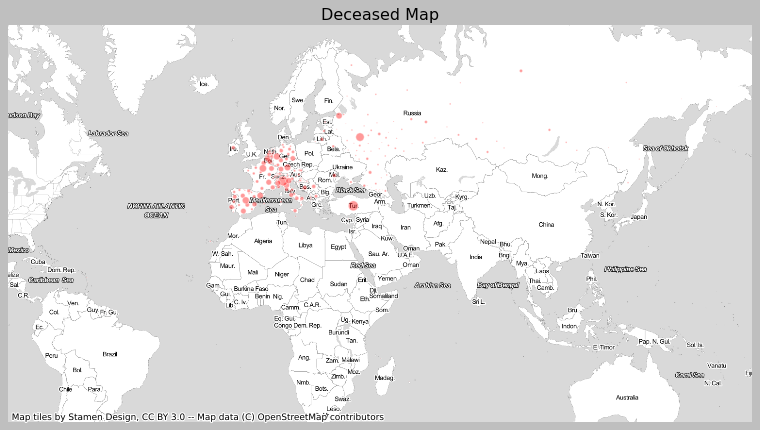

In [290]:
# Using OpenStreetMap
fig , ax = plt.subplots (figsize = (12,10))
gdf[gdf["Date"] == "2021-03-17"].to_crs (epsg = 3857).plot(markersize = 'normalized_death', alpha = 0.4, ax = ax, color = 'Red', edgecolor = 'White')
# Using ctx libarry which is match with geopandas
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)
plt.title ('Deceased Map')
plt.axis ("off");

AS we see in normalize map, countries like Italy, Russia and France witnessed a large number of death comparing to other European countries. 

# Summary and suggestions for future work.

In this assignment, we used COVID-19 datasets from european datasets and John Hopkings for our analysis. We reviewed the number of death and confimred cases and added new features such as daily new confirmed datacase, new death cases, confirmed growth rate, confirmed death rate and world shape data to enrich the current datasets. We reviewed Ireland CORONAVIRUS data and compare it with the countries with almost same population. It seems that, the number of cases in Ireland was very high from starting of 2021. In the last month, the number has been decreases which could be the result of vaccination or level 5 restriction. 
* **Feuture Work** : <br>  1-  We have plot the world map based on the normalised death number in Europe, while a better normalisation formula is required to capture the deth cases in european zones that consider the population and geographic densities.
* 2- We realise the number of death and confirmed cases in Ireland is more than European countries, while we need to add governmenr mitigation policies and Vaccination data to such datasets to quantify the government measures and then do the comparison.
* 3- We see the number of death decreased in Ireland in the last two months. For better analysis, we need to add Census datasets to our current ones to do the analysis based on the population age to see if this is happening because of vaccins or level-5 restriction.
